# Подготовка данных

In [213]:
import pandas as pd

In [214]:
path = '/content/data.xlsx'
data = pd.read_excel(path)
data = pd.DataFrame(data)

In [215]:
# уберём пустой столбец
data = data.drop(['Unnamed: 5'], axis='columns')

In [216]:
display(data)

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


# Вопрос №1
Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.


In [217]:
# создадим отдельную таблицу с данными на июль 2021
july_filter = data['status'] == 'Июль 2021'
august_filter = data['status'] == 'Август 2021'

In [218]:
display(data[july_filter]) # 258 индекс
display(data[august_filter]) # 369 индекс

,client_id,sum,status,sale,new/current,document,receiving_date
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN


,client_id,sum,status,sale,new/current,document,receiving_date
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN


In [219]:
df_july = data.loc[259:368, :]
payment_filter = df_july['status'] != 'ПРОСРОЧЕНО'
df_result_1 = df_july[payment_filter]

In [220]:
display(df_result_1[['sum', 'status']])

,sum,status
259,13838.7,ОПЛАЧЕНО
260,1586.5,ОПЛАЧЕНО
261,2996.7,ОПЛАЧЕНО
262,4313.7,ОПЛАЧЕНО
263,19407.7,ОПЛАЧЕНО
...,...,...
363,25083.7,ОПЛАЧЕНО
364,4878.7,ОПЛАЧЕНО
365,11703.7,ОПЛАЧЕНО
367,4048.7,ОПЛАЧЕНО


In [221]:
result = df_july['sum'].sum()
print(f'''Общая выручка за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен составляет {round(result, 2)} рублей''')

Общая выручка за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен составляет 861874.17 рублей


# Вопрос №2
Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком

In [222]:
import matplotlib.pyplot as plt

In [223]:
df_sum_sample = data[['sum', 'receiving_date']]
# уберём пустые значения
df_sum_sample = df_sum_sample.dropna()

# уберём строки без даты получения платежа
df_sum_sample = df_sum_sample[df_sum_sample['receiving_date'] != '-']
df_sum_sample = df_sum_sample.sort_values(by=['receiving_date'])

# оставляем данные за июль
start = pd.to_datetime('2021-07-01')
end = pd.to_datetime('2021-08-01')
df_sum_sample = df_sum_sample[(df_sum_sample['receiving_date'] >= start) & (df_sum_sample['receiving_date'] < end)]

# группируем данные по дням
df_sum_sample = df_sum_sample.groupby(['receiving_date']).sum()

In [224]:
display(df_sum_sample)

,sum
receiving_date,
2021-07-01,19187.90
2021-07-02,24448.15
2021-07-05,7270.90
2021-07-06,102776.12
2021-07-07,56170.30
2021-07-08,32527.70
2021-07-09,29503.05
2021-07-12,36484.80
2021-07-13,66333.70


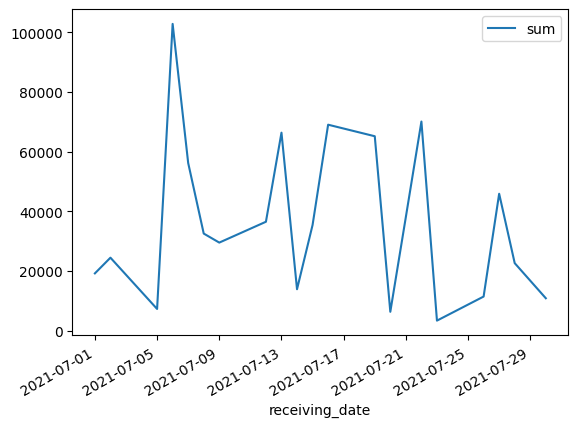

In [225]:
df_sum_sample.plot(y='sum')
plt.show()

# Вопрос №3
Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [226]:
# создадим отдельную таблицу с данными на сентябрь 2021
sep_filter = data['status'] == 'Сентябрь 2021'
oct_filter = data['status'] == 'Октябрь 2021'

display(data[sep_filter]) # 484 индекс
display(data[oct_filter]) # 594 индекс

df_sep = data[['sale', 'sum']].loc[485:593, :]

,client_id,sum,status,sale,new/current,document,receiving_date
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN


,client_id,sum,status,sale,new/current,document,receiving_date
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN


In [227]:
display(df_sep)

,sale,sum
485,Иванов,14288.7
486,Иванов,1494.0
487,Кузнецова,893.7
488,Андреев,18142.7
489,Филимонова,3833.7
...,...,...
589,Андреев,1313.7
590,Васильев,3453.7
591,Васильев,4328.7
592,Филимонова,4078.7


In [228]:
# группируем данные по менеджерам
df_sep = df_sep.groupby(['sale']).sum()

# сортируем по сумме продажи
df_sep = df_sep.sort_values(by=['sum'], ascending=False)

In [229]:
display(df_sep)

,sum
sale,
Смирнов,221525.70
Петрова,149344.46
Андреев,133652.50
Иванов,94770.60
Кузнецова,72228.40
Филимонова,59514.47
Васильев,49895.45
Соколов,35183.50
Михайлов,4268.70


# Вопрос №4
Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [230]:
# посмотрим даты отчётности в таблице
date_filter = data['client_id'].isnull()
display(data[date_filter]) # октябрь 2021 - 595 и до конца

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN


In [231]:
df_oct = data[['new/current']].loc[595:, :]
display(df_oct)

,new/current
595,текущая
596,текущая
597,новая
598,текущая
599,текущая
...,...
725,текущая
726,новая
727,новая
728,новая


In [232]:
df_oct.value_counts()

new/current
текущая        99
новая          36
dtype: int64

# Вопрос №5
Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [233]:
# посмотрим даты отчётности в таблице
date_filter = data['client_id'].isnull()
display(data[date_filter])

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN


In [234]:
# оставляем майские сделки
df_may = data.loc[1:128, :]
display(df_may)

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00


In [235]:
# найдём оригиналы документов
orig_filter = df_may['document'] == 'оригинал'
df_may = df_may[orig_filter]

display(df_may)

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00


In [236]:
# оставляем данные о полученных документах за июнь 2021
start = pd.to_datetime('2021-07-01')
end = pd.to_datetime('2021-08-01')
df_may = df_may[(df_may['receiving_date'] >= start) & (df_may['receiving_date'] < end)]

display(df_may)

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
12,32.0,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
13,34.0,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
14,34.0,3752.63,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
18,43.0,1961.20,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27 00:00:00
19,43.0,1961.20,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27 00:00:00
26,52.0,2843.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-19 00:00:00
43,83.0,8763.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00


In [237]:
df_may[['document']].value_counts()

document
оригинал    37
dtype: int64

# Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

1)	За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2)	За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.


In [238]:
# посмотрим даты отчётности в таблице
date_filter = data['client_id'].isnull()
display(data[date_filter])

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN


In [239]:
# май 2021
df_may = data.loc[1:128, :]

display(df_may)

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00


In [240]:
# июнь 2021
df_june = data.loc[130:257, :]

display(df_june)

,client_id,sum,status,sale,new/current,document,receiving_date
130,316.0,35653.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09 00:00:00
131,15.0,13518.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09 00:00:00
132,16.0,985.3,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09 00:00:00
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09 00:00:00
134,21.0,4233.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17 00:00:00
...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00


In [241]:
# уберём строки без даты получения платежа

df_may = df_may[df_may['receiving_date'] != '-']
df_june = df_june[df_june['receiving_date'] != '-']

In [242]:
# Для начала отфильтруем записи по дате получения документов
# Нам нужны записи, где документы были получены позже 01.07.2023

date = pd.to_datetime('2021-07-01')

df_may = df_may[df_may['receiving_date'] >= date]
df_june = df_june[df_june['receiving_date'] >= date]

## Новые сделки за май

In [243]:
# подсчитаем новые сделки за май
# статус == "ОПЛАЧЕНО"
# new/current == 'новая'
# 7%

new_may_df = df_may[(df_may['status'] == 'ОПЛАЧЕНО') & (df_may['new/current'] == 'новая')]
new_may_df = new_may_df[['sale', 'sum']]
new_may_df = new_may_df.groupby(by='sale').sum()

display(new_may_df)

,sum
sale,
Петрова,5452.7
Селиванов,25894.8


In [244]:
# проценты за новые сделки
new_may_df['sum'] = new_may_df['sum'] * 0.07
display(new_may_df)

,sum
sale,
Петрова,381.689
Селиванов,1812.636


## Текущие сделки за май

In [245]:
# текущие сделки за май
# 5%, если больше 10 тыс.
# иначе 3%
# статус НЕ 'ПРОСРОЧЕНО'

cur_may__upper_df = df_may[(df_may['status'] != 'ПРОСРОЧЕНО') & (df_may['sum'] >= 10000)]
cur_may__lower_df = df_may[(df_may['status'] != 'ПРОСРОЧЕНО') & (df_may['sum'] < 10000)]

In [246]:
display(cur_may__upper_df)

,client_id,sum,status,sale,new/current,document,receiving_date
48,90.0,16123.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28 00:00:00
61,112.0,18773.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-12 00:00:00


In [247]:
display(cur_may__lower_df)

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
7,21.0,3613.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13 00:00:00
12,32.0,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
13,34.0,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
14,34.0,3752.63,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00
18,43.0,1961.20,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27 00:00:00
19,43.0,1961.20,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27 00:00:00
21,46.0,4945.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23 00:00:00


In [248]:
# сгруппируем таблицу сделок больше 10 тыс.
cur_may__upper_df = cur_may__upper_df[['sale', 'sum']]
cur_may__upper_df = cur_may__upper_df.groupby(by='sale').sum()

display(cur_may__upper_df)

,sum
sale,
Иванов,18773.7
Смирнов,16123.7


In [249]:
#сгруппируем таблицу сделок меньше 10 тыс.
cur_may__lower_df = cur_may__lower_df[['sale', 'sum']]
cur_may__lower_df = cur_may__lower_df.groupby(by='sale').sum()

display(cur_may__lower_df)

,sum
sale,
Андреев,19551.70
Васильев,3479.10
Иванов,25079.80
Кузнецова,35648.87
Петрова,54939.00
Селиванов,29817.20
Смирнов,24696.60
Филимонова,22128.95


In [250]:
# подсчитаем бонусы %5
cur_may__upper_df['sum'] = cur_may__upper_df['sum'] * 0.05

display(cur_may__upper_df)

,sum
sale,
Иванов,938.685
Смирнов,806.185


In [251]:
# подсчитаем бонусы %3
cur_may__lower_df['sum'] = cur_may__lower_df['sum'] * 0.03

display(cur_may__lower_df)

,sum
sale,
Андреев,586.5510
Васильев,104.3730
Иванов,752.3940
Кузнецова,1069.4661
Петрова,1648.1700
Селиванов,894.5160
Смирнов,740.8980
Филимонова,663.8685


In [252]:
# Объединим таблицы
cur_may = pd.concat([cur_may__upper_df, cur_may__lower_df], axis=0)
cur_may = cur_may.groupby(by='sale').sum()
display(cur_may)

,sum
sale,
Андреев,586.5510
Васильев,104.3730
Иванов,1691.0790
Кузнецова,1069.4661
Петрова,1648.1700
Селиванов,894.5160
Смирнов,1547.0830
Филимонова,663.8685


## Новые сделки за июнь

In [253]:
# подсчитаем новые сделки за июнь
# статус == "ОПЛАЧЕНО"
# new/current == 'новая'
# 7%

new_june_df = df_june[(df_june['status'] == 'ОПЛАЧЕНО') & (df_june['new/current'] == 'новая')]
new_june_df = new_june_df[['sale', 'sum']]
new_june_df = new_june_df.groupby(by='sale').sum()

display(new_june_df)

,sum
sale,
Васильев,2678.7
Петрова,35653.7
Селиванов,36061.1
Смирнов,3053.7
Филимонова,10392.4


In [254]:
# проценты за новые сделки
new_june_df['sum'] = new_june_df['sum'] * 0.07
display(new_june_df)

,sum
sale,
Васильев,187.509
Петрова,2495.759
Селиванов,2524.277
Смирнов,213.759
Филимонова,727.468


## Текущие сделки за июнь

In [261]:
# текущие сделки за июнь
# 5%, если больше 10 тыс.
# иначе 3%
# статус НЕ 'ПРОСРОЧЕНО'

cur_june__upper_df = df_june[(df_june['status'] != 'ПРОСРОЧЕНО') & (df_june['sum'] >= 10000)]
cur_june__lower_df = df_june[(df_june['status'] != 'ПРОСРОЧЕНО') & (df_june['sum'] < 10000)]

In [262]:
display(cur_june__upper_df)

,client_id,sum,status,sale,new/current,document,receiving_date
130,316.0,35653.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09 00:00:00
131,15.0,13518.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09 00:00:00
136,24.0,17512.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-22 00:00:00
137,28.0,10858.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-30 00:00:00
143,39.0,10883.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-06 00:00:00
168,77.0,16653.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00
169,290.0,18453.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00
176,87.0,14143.70,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-07-08 00:00:00
186,111.0,10253.70,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-08-18 00:00:00
187,112.0,31677.30,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-06 00:00:00


In [263]:
display(cur_june__lower_df)

,client_id,sum,status,sale,new/current,document,receiving_date
132,16.0,985.3,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09 00:00:00
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09 00:00:00
134,21.0,4233.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17 00:00:00
135,23.0,8933.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-16 00:00:00
138,30.0,3833.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-27 00:00:00
...,...,...,...,...,...,...,...
252,277.0,4798.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08 00:00:00
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00


In [264]:
# сгруппируем таблицу сделок больше 10 тыс.
cur_june__upper_df = cur_june__upper_df[['sale', 'sum']]
cur_june__upper_df = cur_june__upper_df.groupby(by='sale').sum()

display(cur_june__upper_df)

,sum
sale,
Андреев,42825.10
Иванов,56079.70
Кузнецова,12639.76
Петрова,81450.80
Селиванов,35107.40
Смирнов,80827.30


In [265]:
#сгруппируем таблицу сделок меньше 10 тыс.
cur_june__lower_df = cur_june__lower_df[['sale', 'sum']]
cur_june__lower_df = cur_june__lower_df.groupby(by='sale').sum()

display(cur_june__lower_df)

,sum
sale,
Андреев,40899.49
Васильев,27517.60
Иванов,49879.60
Кузнецова,93183.20
Петрова,137295.18
Селиванов,29057.20
Смирнов,56374.20
Соколов,8973.70
Филимонова,41279.78


In [266]:
# подсчитаем бонусы
cur_june__upper_df['sum'] = cur_june__upper_df['sum'] * 0.05
cur_june__lower_df['sum'] = cur_june__lower_df['sum'] * 0.03

In [267]:
display(cur_june__upper_df)

,sum
sale,
Андреев,2141.255
Иванов,2803.985
Кузнецова,631.988
Петрова,4072.540
Селиванов,1755.370
Смирнов,4041.365


In [268]:
display(cur_june__lower_df)

,sum
sale,
Андреев,1226.9847
Васильев,825.5280
Иванов,1496.3880
Кузнецова,2795.4960
Петрова,4118.8554
Селиванов,871.7160
Смирнов,1691.2260
Соколов,269.2110
Филимонова,1238.3934


In [270]:
# Объединим таблицы
cur_june = pd.concat([cur_june__upper_df, cur_june__lower_df], axis=0)
cur_june = cur_june.groupby(by='sale').sum()
display(cur_june)

,sum
sale,
Андреев,3368.2397
Васильев,825.5280
Иванов,4300.3730
Кузнецова,3427.4840
Петрова,8191.3954
Селиванов,2627.0860
Смирнов,5732.5910
Соколов,269.2110
Филимонова,1238.3934


## Итоговая таблица
- new_may_df - новые сделки за май
- cur_may - текущие сделки за май
- new_june_df - новые сделки за июнь
- cur_june - текущие сделки за июнь

In [272]:
result = pd.concat([new_may_df, cur_may, new_june_df, cur_june], axis=0)
result = result.groupby(by='sale').sum()

display(result)

,sum
sale,
Андреев,3954.7907
Васильев,1117.4100
Иванов,5991.4520
Кузнецова,4496.9501
Петрова,12717.0134
Селиванов,7858.5150
Смирнов,7493.4330
Соколов,269.2110
Филимонова,2629.7299
